In [33]:
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
#read csv data
df = pd.read_csv('C:\\Users\\lenovo\\Downloads\\Compressed\\archive\\data.csv',encoding= 'unicode_escape')

In [35]:
#view first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [36]:
#null check
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [37]:
#drop nulls in description column
df_new = df.dropna(subset=['Description'])

In [38]:
#descriptive stats check
df_new.describe()

# Here we can see quantity has some negative values, we will drop such entries

,Quantity,UnitPrice,CustomerID
count,540455.000000,540455.000000,406829.000000
mean,9.603129,4.623519,15287.690570
std,218.007598,96.889628,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [39]:
#remove negetive qty
df_new = df_new[df_new.Quantity > 0]

In [40]:
#descriptive stats check
df_new.describe()

,Quantity,UnitPrice,CustomerID
count,530693.000000,530693.000000,397924.000000
mean,10.605819,3.861599,15294.315171
std,156.637853,41.833162,1713.169877
min,1.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


## Popular Items Globally

In [41]:
#pivoting to get top products by quantity
global_popularity=df_new.pivot_table(index=['StockCode','Description'], values='Quantity',
                                     aggfunc='sum').sort_values(by='Quantity', ascending=False)
print('Top 10 popular items globally....')
global_popularity.head(10)

Top 10 popular items globally....


,,Quantity
StockCode,Description,
23843,"PAPER CRAFT , LITTLE BIRDIE",80995
23166,MEDIUM CERAMIC TOP STORAGE JAR,78033
84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,55047
85099B,JUMBO BAG RED RETROSPOT,48478
85123A,WHITE HANGING HEART T-LIGHT HOLDER,37603
22197,POPCORN HOLDER,36761
84879,ASSORTED COLOUR BIRD ORNAMENT,36461
21212,PACK OF 72 RETROSPOT CAKE CASES,36419
23084,RABBIT NIGHT LIGHT,30788


Text(0, 0.5, 'Item')

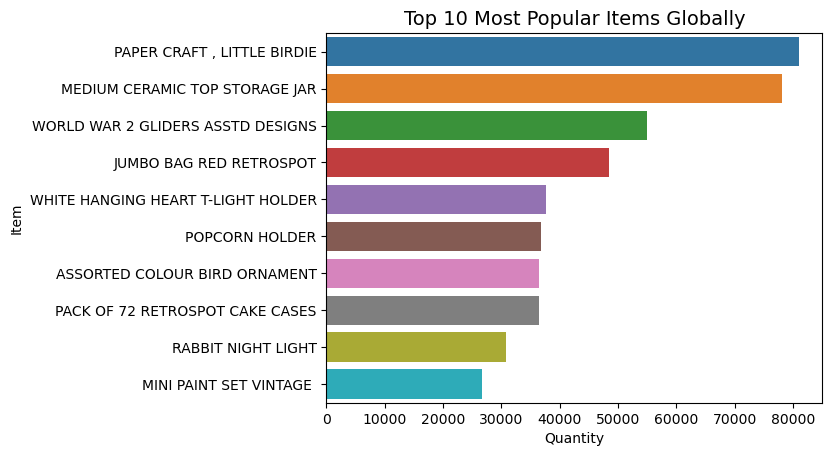

In [42]:
#viz - top products by quantity
global_popularity.reset_index(inplace=True)
sns.barplot(y='Description', x='Quantity', data=global_popularity.head(10))
plt.title('Top 10 Most Popular Items Globally', fontsize=14)
plt.ylabel('Item')

## Popular Items Countrywise

In [43]:
#pivoting to get top products by quantity and country
countrywise=df_new.pivot_table(index=['Country','StockCode','Description'], values='Quantity', 
                               aggfunc='sum').reset_index()
countrywise

,Country,StockCode,Description,Quantity
0,Australia,15036,ASSORTED COLOURS SILK FAN,600
1,Australia,15056BL,EDWARDIAN PARASOL BLACK,3
2,Australia,16161P,WRAP ENGLISH ROSE,400
3,Australia,16169E,WRAP 50'S CHRISTMAS,25
4,Australia,20665,RED RETROSPOT PURSE,6
...,...,...,...,...
20248,Unspecified,85180A,RED HEARTS LIGHT CHAIN,2
20249,Unspecified,85180B,PINK HEARTS LIGHT CHAIN,1
20250,Unspecified,85212,MINI PAINTED GARDEN DECORATION,12
20251,Unspecified,85213,MINI ZINC GARDEN DECORATIONS,12


Text(0, 0.5, 'Item')

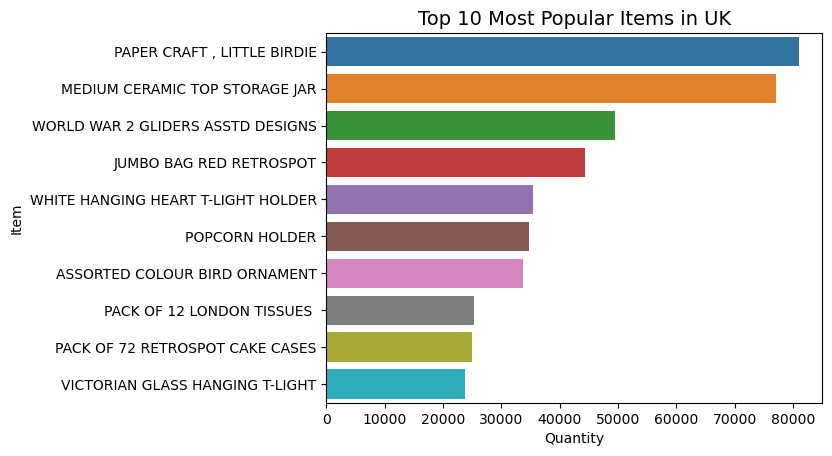

In [44]:
#Viz
sns.barplot(y='Description', x='Quantity', data=countrywise[countrywise['Country']=='United Kingdom'].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items in UK', fontsize=14)
plt.ylabel('Item')

Text(0, 0.5, 'Item')

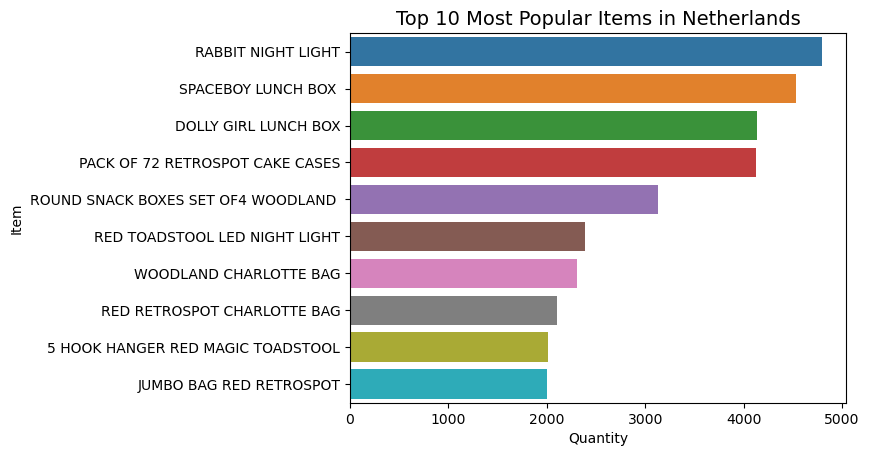

In [45]:
#Viz
sns.barplot(y='Description', x='Quantity', data=countrywise[countrywise['Country']=='Netherlands'].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items in Netherlands', fontsize=14)
plt.ylabel('Item')

Text(0, 0.5, 'Item')

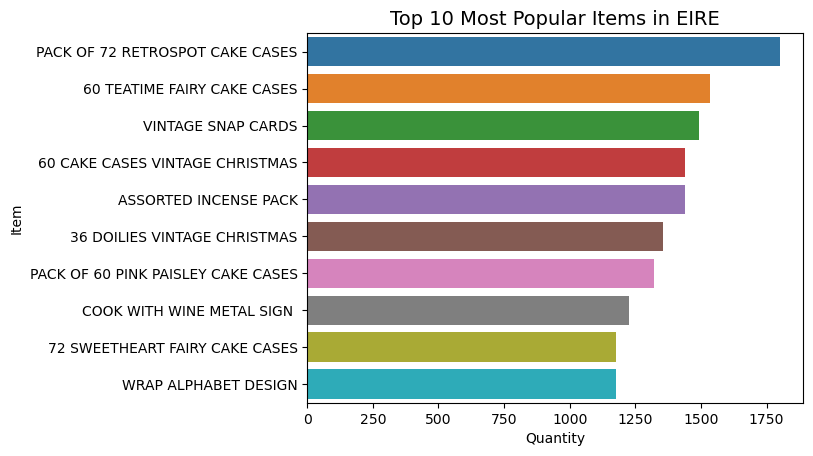

In [46]:
#Viz
sns.barplot(y='Description', x='Quantity', data=countrywise[countrywise['Country']=='EIRE'].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items in EIRE', fontsize=14)
plt.ylabel('Item')

Text(0, 0.5, 'Item')

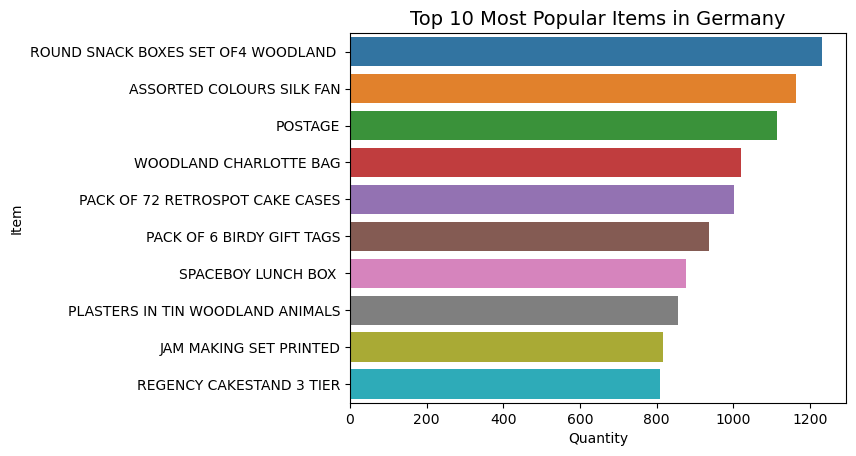

In [47]:
#Viz
sns.barplot(y='Description', x='Quantity', data=countrywise[countrywise['Country']=='Germany'].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items in Germany', fontsize=14)
plt.ylabel('Item')

## Popular Items Monthwise

In [48]:
b=list(df_new.InvoiceDate)

In [49]:
for i in range(len(b)):
    b[i]=b[i].replace("/","-")

In [50]:
import datetime
#format datetime
df_new['InvoiceDate'] = pd.to_datetime(b, format='%m-%d-%Y %H:%M')#pd.to_datetime(df_new.InvoiceDate, format='%d-%m-%Y %H:%M')
df_new.insert(loc=2, column='year_month', value=df_new['InvoiceDate'].map(lambda x: 100*x.year + x.month))
df_new.insert(loc=3, column='month', value=df_new.InvoiceDate.dt.month)
# +1 to make Monday=1.....until Sunday=7
df_new.insert(loc=4, column='day', value=(df_new.InvoiceDate.dt.dayofweek)+1)
df_new.insert(loc=5, column='hour', value=df_new.InvoiceDate.dt.hour)

In [51]:
df_new

,InvoiceNo,StockCode,year_month,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,201012,12,3,8,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,201012,12,3,8,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,201012,12,3,8,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,201012,12,3,8,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,201012,12,3,8,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,201112,12,5,12,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,201112,12,5,12,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,201112,12,5,12,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,201112,12,5,12,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Text(0, 0.5, 'Item')

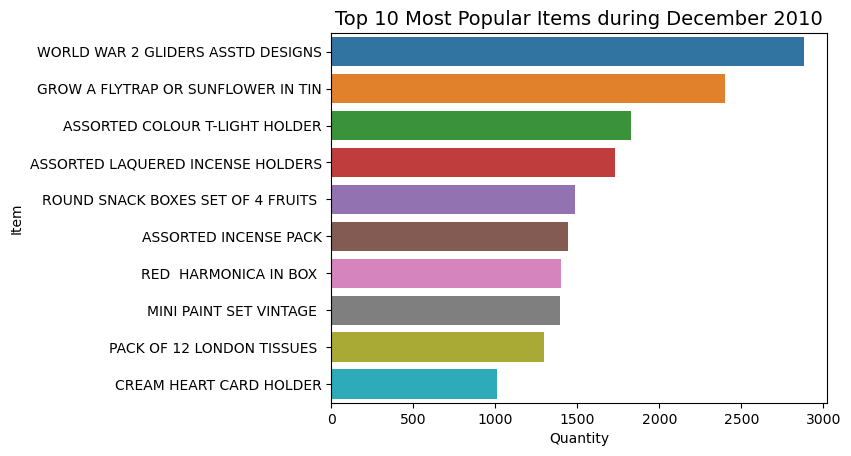

In [52]:
#viz - popular items by month
sns.barplot(y='Description', x='Quantity', data=df_new[df_new['year_month']==201012].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items during December 2010', fontsize=14)
plt.ylabel('Item')

Text(0, 0.5, 'Item')

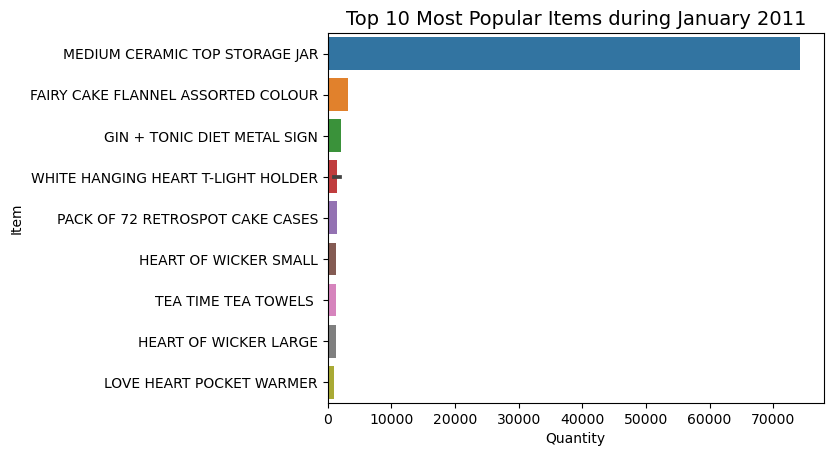

In [53]:
#viz
sns.barplot(y='Description', x='Quantity', data=df_new[df_new['year_month']==201101].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items during January 2011', fontsize=14)
plt.ylabel('Item')

Text(0, 0.5, 'Item')

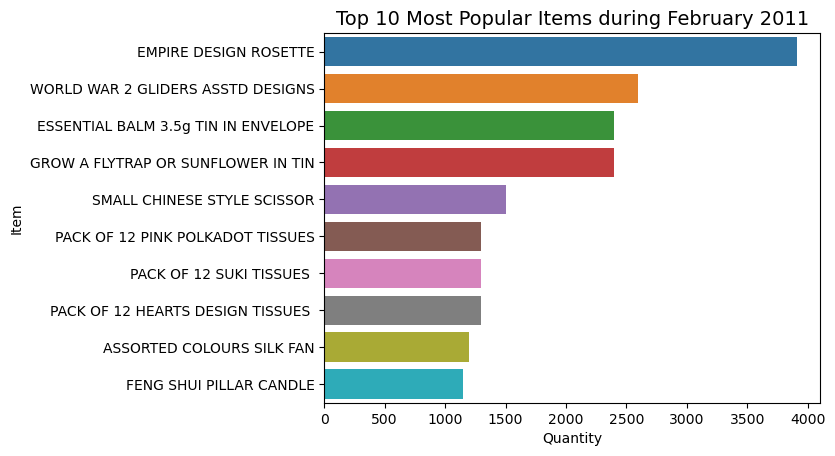

In [54]:
sns.barplot(y='Description', x='Quantity', data=df_new[df_new['year_month']==201102].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items during February 2011', fontsize=14)
plt.ylabel('Item')

Text(0, 0.5, 'Item')

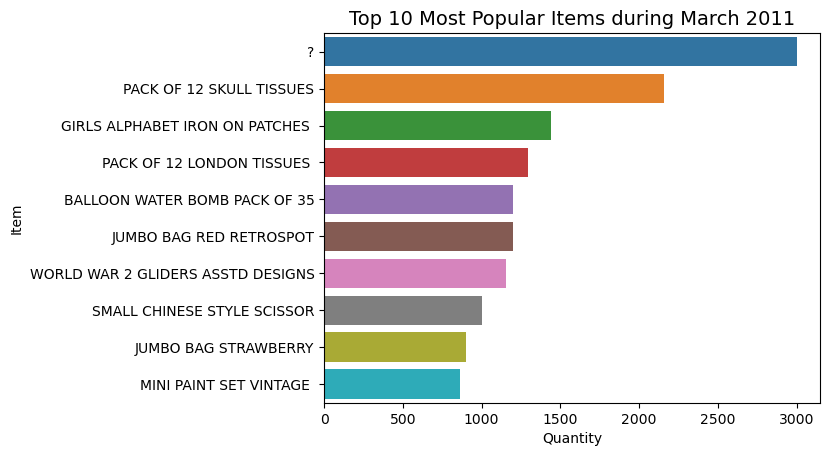

In [55]:
sns.barplot(y='Description', x='Quantity', data=df_new[df_new['year_month']==201103].sort_values(by='Quantity', ascending=False).head(10))
plt.title('Top 10 Most Popular Items during March 2011', fontsize=14)
plt.ylabel('Item')

## Buy Again

In [56]:
from collections import Counter

# Extracting all the items bought by customer 17850
desc = df_new[df_new['CustomerID']==17850].Description
desc

0        WHITE HANGING HEART T-LIGHT HOLDER
1                       WHITE METAL LANTERN
2            CREAM CUPID HEARTS COAT HANGER
3       KNITTED UNION FLAG HOT WATER BOTTLE
4            RED WOOLLY HOTTIE WHITE HEART.
                       ...                 
4540           SET 7 BABUSHKA NESTING BOXES
4541               IVORY EMBROIDERED QUILT 
4542      GLASS STAR FROSTED T-LIGHT HOLDER
4543              HAND WARMER RED POLKA DOT
4544                 HAND WARMER UNION JACK
Name: Description, Length: 297, dtype: object

In [57]:
# Counting the number of times that purchase has been repeated
count = Counter(desc)

# Counter sorts the items in descending order of purchased count

# Printing the count
print(count)

Counter({'WHITE HANGING HEART T-LIGHT HOLDER': 17, 'WHITE METAL LANTERN': 17, 'KNITTED UNION FLAG HOT WATER BOTTLE': 17, 'RED WOOLLY HOTTIE WHITE HEART.': 17, 'GLASS STAR FROSTED T-LIGHT HOLDER': 17, 'HAND WARMER UNION JACK': 17, 'HAND WARMER RED POLKA DOT': 17, 'SET 7 BABUSHKA NESTING BOXES': 16, 'CREAM CUPID HEARTS COAT HANGER': 15, 'RETRO COFFEE MUGS ASSORTED': 15, 'VINTAGE BILLBOARD DRINK ME MUG': 15, 'VINTAGE BILLBOARD LOVE/HATE MUG': 15, 'WOOD 2 DRAWER CABINET WHITE FINISH': 15, 'WOODEN PICTURE FRAME WHITE FINISH': 15, 'WOODEN FRAME ANTIQUE WHITE ': 15, 'SAVE THE PLANET MUG': 14, 'WOOD S/3 CABINET ANT WHITE FINISH': 14, 'JUMBO SHOPPER VINTAGE RED PAISLEY': 10, 'IVORY EMBROIDERED QUILT ': 8, 'EDWARDIAN PARASOL RED': 7, 'EDWARDIAN PARASOL BLACK': 4})


In [58]:
def buy_again(customerid):
    
    # Fetching the items bought by the customer for provided customer id
    items_bought = df_new[df_new['CustomerID']==customerid].Description
    
    # Count and sort the repeated purchases
    bought_again = Counter(items_bought)
    
    # Convert counter to list for printing recommendations
    buy_again_list = list(bought_again)
    
    # Printing the recommendations
    print('Items you would like to buy again :')
    return(buy_again_list)

In [59]:
buy_again(17850)

Items you would like to buy again :


['WHITE HANGING HEART T-LIGHT HOLDER',
 'WHITE METAL LANTERN',
 'CREAM CUPID HEARTS COAT HANGER',
 'KNITTED UNION FLAG HOT WATER BOTTLE',
 'RED WOOLLY HOTTIE WHITE HEART.',
 'SET 7 BABUSHKA NESTING BOXES',
 'GLASS STAR FROSTED T-LIGHT HOLDER',
 'HAND WARMER UNION JACK',
 'HAND WARMER RED POLKA DOT',
 'EDWARDIAN PARASOL RED',
 'RETRO COFFEE MUGS ASSORTED',
 'SAVE THE PLANET MUG',
 'VINTAGE BILLBOARD DRINK ME MUG',
 'VINTAGE BILLBOARD LOVE/HATE MUG',
 'WOOD 2 DRAWER CABINET WHITE FINISH',
 'WOOD S/3 CABINET ANT WHITE FINISH',
 'WOODEN PICTURE FRAME WHITE FINISH',
 'WOODEN FRAME ANTIQUE WHITE ',
 'EDWARDIAN PARASOL BLACK',
 'IVORY EMBROIDERED QUILT ',
 'JUMBO SHOPPER VINTAGE RED PAISLEY']

In [60]:
buy_again(17892)

Items you would like to buy again :


['SET/4 COLOURFUL MIXING BOWLS',
 'STRAWBERRY RAFFIA FOOD COVER',
 'RED ENCHANTED FOREST PLACEMAT',
 'OVEN MITT APPLES DESIGN',
 'AIRLINE BAG VINTAGE JET SET WHITE',
 'AGED GLASS SILVER T-LIGHT HOLDER',
 'FRENCH ENAMEL POT W LID',
 'SET OF 3 CAKE TINS SKETCHBOOK',
 'SPACE CADET RED',
 'SPACE CADET WHITE',
 'SPACE FROG',
 'SPACE OWL',
 'DELUXE SEWING KIT ',
 '12 MESSAGE CARDS WITH ENVELOPES',
 'GOLD MINI TAPE MEASURE ',
 'ENVELOPE 50 BLOSSOM IMAGES',
 'CLASSIC FRENCH STYLE BASKET NATURAL',
 'PINK CREAM FELT CRAFT TRINKET BOX ',
 'SMALL ZINC/GLASS CANDLEHOLDER',
 'SET OF 6 T-LIGHTS CACTI ',
 'LED TEA LIGHTS',
 'TWO DOOR CURIO CABINET',
 'FAMILY ALBUM WHITE PICTURE FRAME',
 'PICTURE FRAME WOOD TRIPLE PORTRAIT',
 'SILVER HANGING T-LIGHT HOLDER',
 'REX CASH+CARRY JUMBO SHOPPER',
 'PIGGY BANK RETROSPOT ']